# EDA - TikTok Dataset

Data Overview:

- 15 unique users
- 2200 Posts (very un-even distribution of posts per user)
- Data Includes a number of engadgment metrics, and potentialy the most valuble part of this dataset is the detailed timestamping of the posts

In [1]:
import pandas as pd

# import the xlsx file
df = pd.read_excel('./training.xlsx')

df.head(5)

,video_id,author_id,author_follower_count,author_following_count,author_total_heart_count,author_total_video_count,video_create_date,video_description,video_definition,video_format,video_comment_count,video_heart_count,video_play_count,video_share_count
0,'6702340935990119686,A10,1400000,6,7200000,285,1560510354,A little throwback to the Mille Miglia 2019 =_...,720p,mp4,26,1241,15400,79
1,'6704612694332280070,A10,1400000,6,7200000,285,1561039289,Innovation and tradition on the Mille Miglia: ...,720p,mp4,3,971,14300,14
2,'6707173090796768518,A10,1400000,6,7200000,285,1561635428,Our #300sl: _x001C_the sports car of the centu...,720p,mp4,8,1306,17600,72
3,'6708980823044918533,A10,1400000,6,7200000,285,1562056323,GLS: make it dance =z <<U+00A5> Cole Walliser ...,720p,mp4,12,1292,16400,86
4,'6712756116222135557,A10,1400000,6,7200000,285,1562935330,"Mille Miglia 209, Day 1 e_x000F_ Those were ex...",720p,mp4,7,1050,14100,15


In [7]:
df['author_id'].value_counts()

author_id
A11    510
A4     415
A10    248
A1     176
A5     145
A2     145
A14     94
A15     75
A9      71
A6      69
A13     53
A3      53
A8      51
A7      48
A12     47
Name: count, dtype: int64

In [2]:
num_unique_authors = df['author_id'].nunique()
print(num_unique_authors)

15


In [3]:
# convert the video_create_date from absolute date to year month day
df['video_create_date'] = pd.to_datetime(df['video_create_date'], unit='s')


In [4]:
df.head()

,video_id,author_id,author_follower_count,author_following_count,author_total_heart_count,author_total_video_count,video_create_date,video_description,video_definition,video_format,video_comment_count,video_heart_count,video_play_count,video_share_count
0,'6702340935990119686,A10,1400000,6,7200000,285,2019-06-14 11:05:54,A little throwback to the Mille Miglia 2019 =_...,720p,mp4,26,1241,15400,79
1,'6704612694332280070,A10,1400000,6,7200000,285,2019-06-20 14:01:29,Innovation and tradition on the Mille Miglia: ...,720p,mp4,3,971,14300,14
2,'6707173090796768518,A10,1400000,6,7200000,285,2019-06-27 11:37:08,Our #300sl: _x001C_the sports car of the centu...,720p,mp4,8,1306,17600,72
3,'6708980823044918533,A10,1400000,6,7200000,285,2019-07-02 08:32:03,GLS: make it dance =z <<U+00A5> Cole Walliser ...,720p,mp4,12,1292,16400,86
4,'6712756116222135557,A10,1400000,6,7200000,285,2019-07-12 12:42:10,"Mille Miglia 209, Day 1 e_x000F_ Those were ex...",720p,mp4,7,1050,14100,15


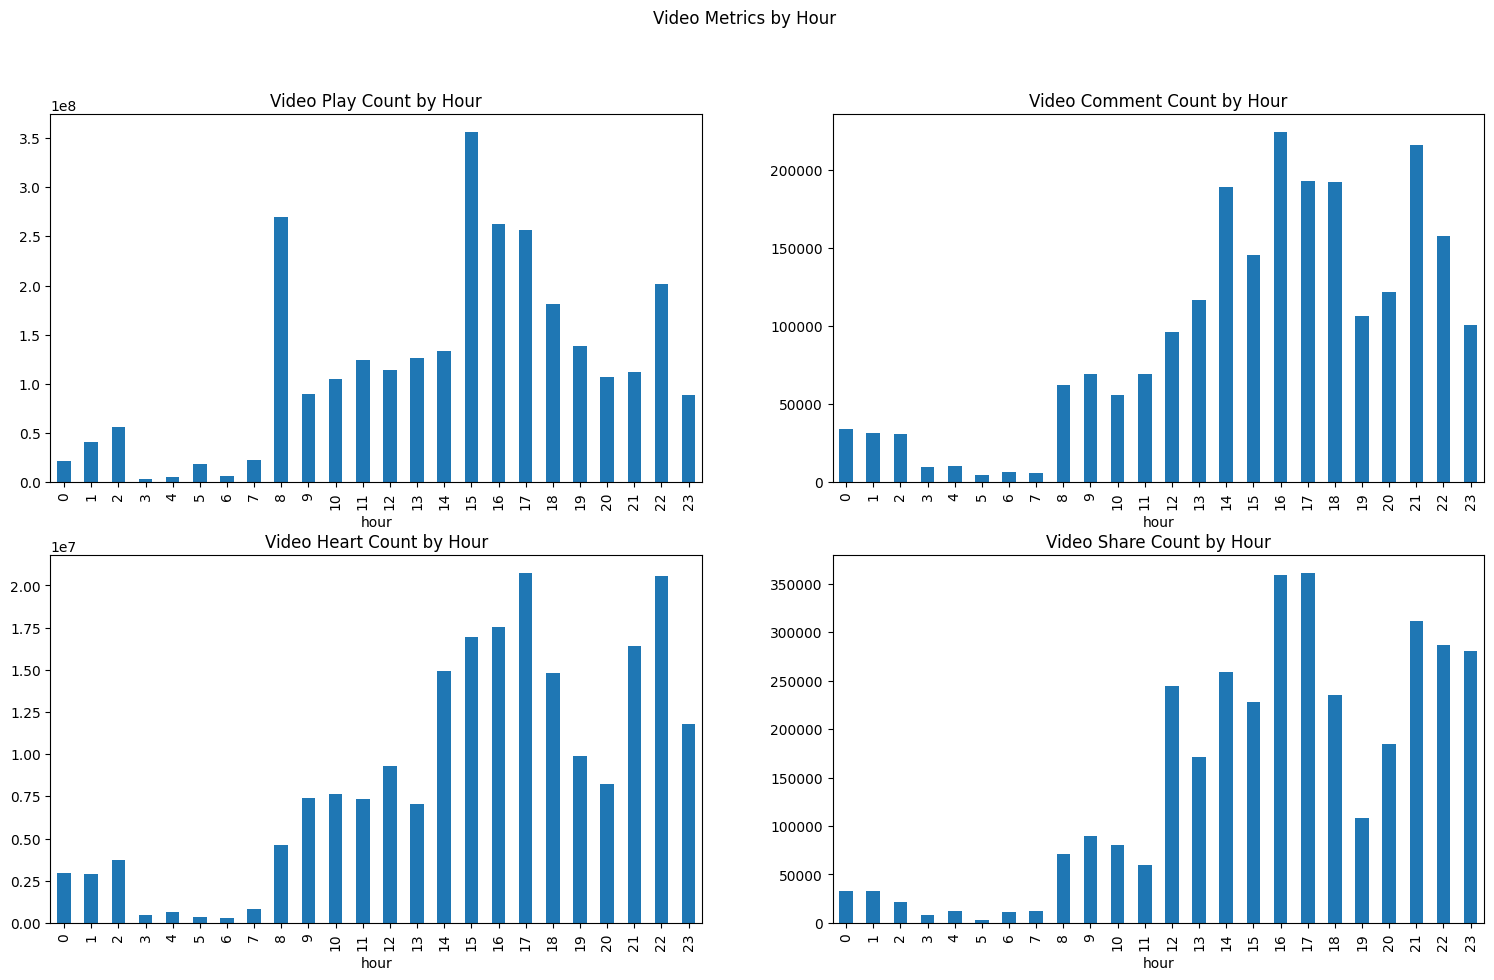

In [20]:
# now let's plot all of these each in different subplots
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)
#increase the figure size
fig.set_size_inches(18.5, 10.5)
df.groupby('hour')['video_play_count'].sum().plot(kind='bar', ax=axs[0, 0])
df.groupby('hour')['video_comment_count'].sum().plot(kind='bar', ax=axs[0, 1])
df.groupby('hour')['video_heart_count'].sum().plot(kind='bar', ax=axs[1, 0])
df.groupby('hour')['video_share_count'].sum().plot(kind='bar', ax=axs[1, 1])
#add subplots titles
axs[0, 0].set_title('Video Play Count by Hour')
axs[0, 1].set_title('Video Comment Count by Hour')
axs[1, 0].set_title('Video Heart Count by Hour')
axs[1, 1].set_title('Video Share Count by Hour')


# add a title to the plot
plt.suptitle('Video Metrics by Hour')
plt.show()


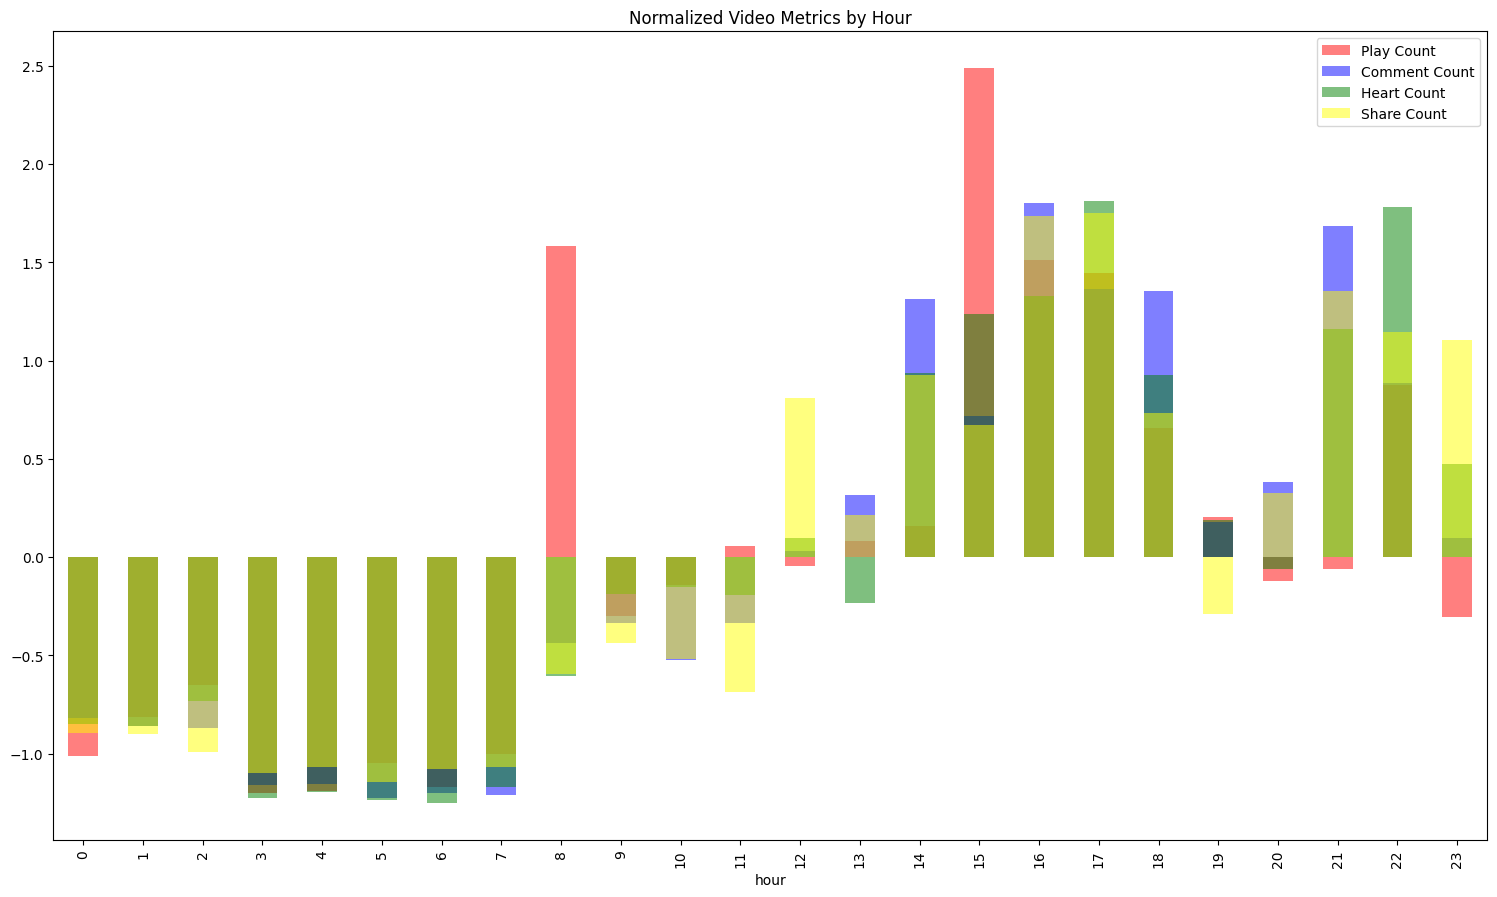

In [23]:

norm_play_count = (df.groupby('hour')['video_play_count'].sum() - df.groupby('hour')['video_play_count'].sum().mean()) / df.groupby('hour')['video_play_count'].sum().std() 
norm_comment_count = (df.groupby('hour')['video_comment_count'].sum() - df.groupby('hour')['video_comment_count'].sum().mean()) / df.groupby('hour')['video_comment_count'].sum().std()
norm_heart_count = (df.groupby('hour')['video_heart_count'].sum() - df.groupby('hour')['video_heart_count'].sum().mean()) / df.groupby('hour')['video_heart_count'].sum().std()
norm_share_count = (df.groupby('hour')['video_share_count'].sum() - df.groupby('hour')['video_share_count'].sum().mean()) / df.groupby('hour')['video_share_count'].sum().std()

# plot them all on the same set of axes for comparison
norm_play_count.plot(kind='bar', color='red', alpha=0.5)
norm_comment_count.plot(kind='bar', color='blue', alpha=0.5)
norm_heart_count.plot(kind='bar', color='green', alpha=0.5)
norm_share_count.plot(kind='bar', color='yellow', alpha=0.5)
plt.legend(['Play Count', 'Comment Count', 'Heart Count', 'Share Count'])
plt.title('Normalized Video Metrics by Hour')
# increase the figure size
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

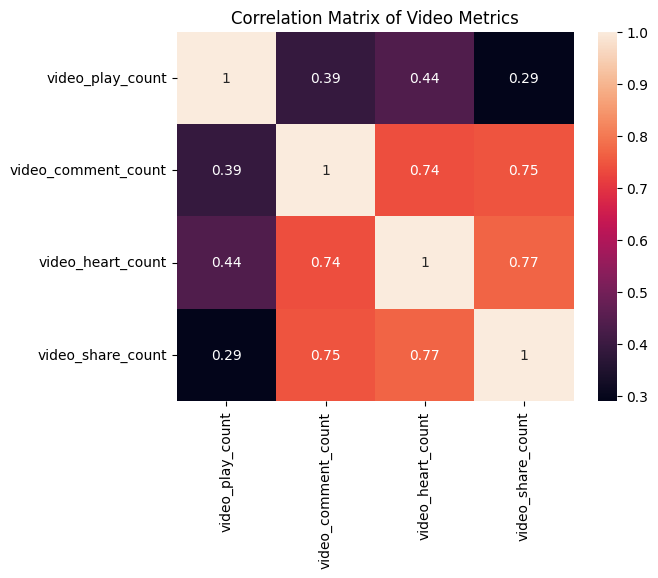

In [24]:
# let's get the correlation between the metrics
df[['video_play_count', 'video_comment_count', 'video_heart_count', 'video_share_count']].corr()

# let's plot the correlation matrix
import seaborn as sns

sns.heatmap(df[['video_play_count', 'video_comment_count', 'video_heart_count', 'video_share_count']].corr(), annot=True)
plt.title('Correlation Matrix of Video Metrics')
plt.show()

In [8]:
df['word_count'] = df['video_description'].apply(lambda x: len(str(x).split()))
df.head()

,video_id,author_id,author_follower_count,author_following_count,author_total_heart_count,author_total_video_count,video_create_date,video_description,video_definition,video_format,video_comment_count,video_heart_count,video_play_count,video_share_count,word_count
0,'6702340935990119686,A10,1400000,6,7200000,285,2019-06-14 11:05:54,A little throwback to the Mille Miglia 2019 =_...,720p,mp4,26,1241,15400,79,11
1,'6704612694332280070,A10,1400000,6,7200000,285,2019-06-20 14:01:29,Innovation and tradition on the Mille Miglia: ...,720p,mp4,3,971,14300,14,14
2,'6707173090796768518,A10,1400000,6,7200000,285,2019-06-27 11:37:08,Our #300sl: _x001C_the sports car of the centu...,720p,mp4,8,1306,17600,72,16
3,'6708980823044918533,A10,1400000,6,7200000,285,2019-07-02 08:32:03,GLS: make it dance =z <<U+00A5> Cole Walliser ...,720p,mp4,12,1292,16400,86,10
4,'6712756116222135557,A10,1400000,6,7200000,285,2019-07-12 12:42:10,"Mille Miglia 209, Day 1 e_x000F_ Those were ex...",720p,mp4,7,1050,14100,15,12


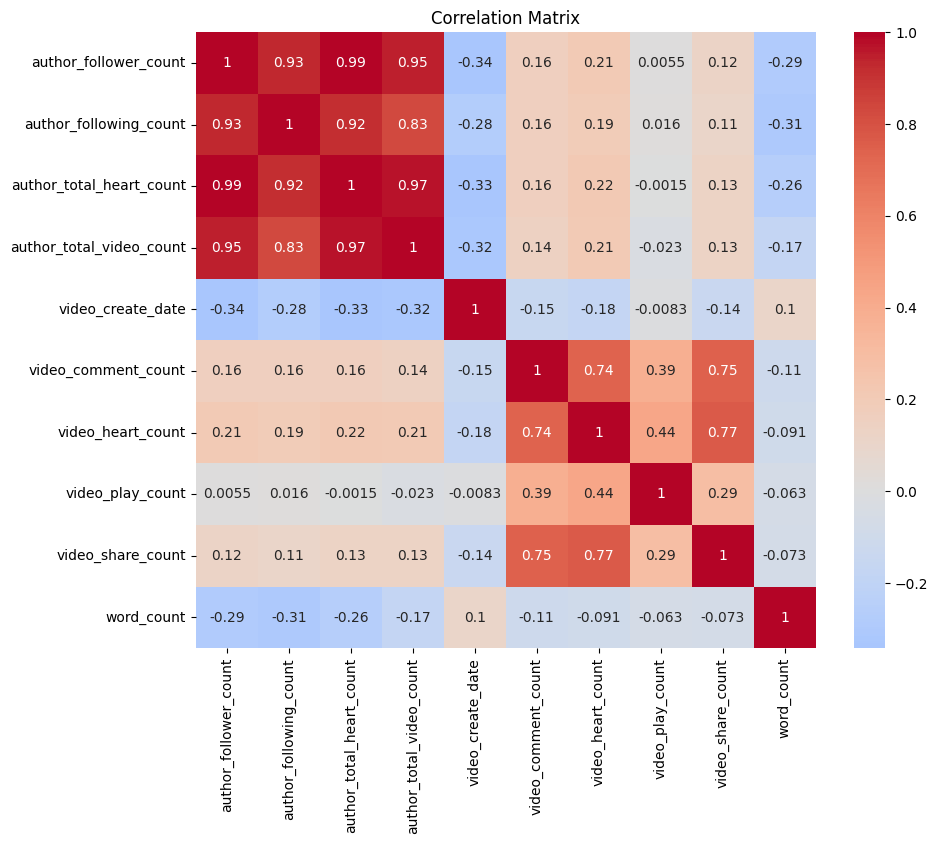

In [9]:
columns_not_in_corr = ['author_id', 'video_id', 'video_description','video_definition',	'video_format']


df_for_corr = df.drop(columns=columns_not_in_corr)

# correlation matrix
corr = df_for_corr.corr()

# plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


# Conclusions:

We can see from a quick set of tests, that there are some notable trends and correlations that can be investigated, and leveraged for determining optimal posting parameters for improved user engadgment. As well as some negative correlations such as that between description word count, and follower count that seem abnormal and deserve further investigation.